# CSE 252B: Computer Vision II, Winter 2019 – Assignment 4
### Instructor: Ben Ochoa
### Due: Wednesday, March 6, 2019, 11:59 PM

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* This assignment contains both math and programming problems.
* All solutions must be written in this notebook
* Math problems must be done in Markdown/LATEX. Remember to show work and describe your solution.
* Programming aspects of this assignment must be completed using Python in this notebook.
* This notebook contains skeleton code, which should not be modified (This is important for standardization to facilate effeciant grading).
* You may use python packages for basic linear algebra, but you may not use packages that directly solve the problem. Ask the instructor if in doubt.
* You must submit this notebook exported as a pdf. You must also submit this notebook as an .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.

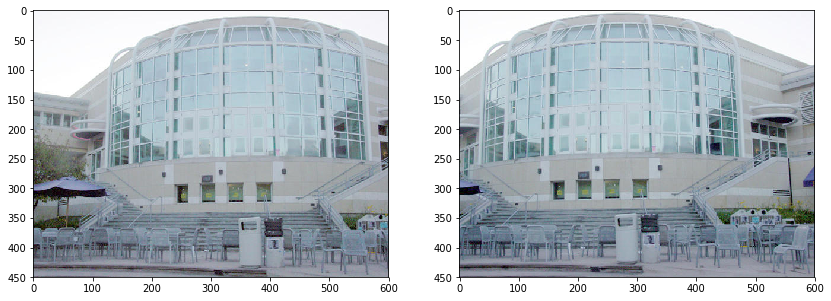

In [4]:
%matplotlib inline
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time

# open the input images
I1 = np.array(Image.open('price_center20.JPG'), dtype='float')/255.
I2 = np.array(Image.open('price_center21.JPG'), dtype='float')/255.

# Display the input images
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(I1)
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

## Problem 1 (Programming): Feature detection (20 points)
Download input data from the course website. The file price_center20.JPG
contains image 1 and the file price_center21.JPG contains image 2. 

For each input image, calculate an image where each pixel value is the minor
eigenvalue of the gradient matrix

$N=\left[ \begin{array}{cc}
\sum\limits_w I_x^2 & \sum\limits_w I_x I_y\\
\sum\limits_w I_x I_y & \sum\limits_w I_y^2
\end{array} \right]$

where w is the window about the pixel, and $I_x$ and $I_y$ are the gradient images in
the x and y direction, respectively. Calculate the gradient images using the fivepoint
central difference operator. Set resulting values that are below a specified
threshold value to zero (hint: calculating the mean instead of the sum in N allows
for adjusting the size of the window without changing the threshold value). Apply
an operation that suppresses (sets to 0) local (i.e., about a window) nonmaximum
pixel values in the minor eigenvalue image. Vary these parameters such that
around 600–650 features are detected in each image. For resulting nonzero pixel
values, determine the subpixel feature coordinate using the Forstner corner point
operator.

#### Report your final values for:
 * the size of the feature detection window (i.e. the size of the window used to calculate the elements in the gradient matrix N)
 * the minor eigenvalue threshold value 
 * the size of the local nonmaximum suppression window 
 * the resulting number of features detected (i.e. corners) in each image.

#### Display figures for:
 * original images with detected features


In [5]:
# def ImageGradient(I, w, t):
#     # inputs: 
#     # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
#     # w is the size of the window used to compute the gradient matrix N
#     # t is the minor eigenvalue threshold
#     #
#     # outputs:
#     # N is the 2x2xmxn gradient matrix
#     # b in the 2x1xmxn vector used in the Forstner corner detector
#     # J0 is the mxn minor eigenvalue image of N before thresholding
#     # J1 is the mxn minor eigenvalue image of N after thresholding
    
#     m,n = I.shape[:2]
#     N = np.zeros((2,2,m,n))
#     b = np.zeros((2,1,m,n))
#     J0 = np.zeros((m,n))
#     J1 = np.zeros((m,n))
    
#     """your code here"""
#     return N, b, J0, J1
  
# def NMS(J, w_nms):
#     # Apply nonmaximum supression to J using window w
#     # For any window in J, the result should only contain 1 nonzero value
#     # In the case of multiple identical maxima in the same window,
#     # the tie may be broken arbitrarily
#     #
#     # inputs: 
#     # J is the minor eigenvalue image input image after thresholding
#     # w_nms is the size of the local nonmaximum suppression window
#     # 
#     # outputs:
#     # J2 is the mxn resulting image after applying nonmaximum suppression
#     # 
    
#     J2 = J.copy()
#     """your code here"""
#     return J2
  

# def ForstnerCornerDetector(J, N, b):
#     # Gather the coordinates of the nonzero pixels in J 
#     # Then compute the sub pixel location of each point using the Forstner operator
#     #
#     # inputs:
#     # J is the NMS image
#     # N is the 2x2xmxn gradient matrix
#     # b is the 2x1xmxn vector computed in the image_gradient function
#     #
#     # outputs:
#     # C is the number of corners detected in each image
#     # pts is the 2xC list of coordinates of subpixel accurate corners
#     #     found using the Forstner corner detector
    
#     """your code here"""
#     return C, pts


# # feature detection
# def RunFeatureDetection(I, w, t, w_nms):
#     N, b, J0, J1 = ImageGradient(I, w, t)
#     J2 = NMS(J1, w_nms)
#     C, pts = ForstnerCornerDetector(J2, N, b)
#     return C, pts, J0, J1, J2



def ImageGradient(I, w, t):
    # inputs: 
    # I is the input image (may be mxn for Grayscale or mxnx3 for RGB)
    # w is the size of the window used to compute the gradient matrix N
    # t is the minor eigenvalue threshold
    #
    # outputs:
    # N is the 2x2xmxn gradient matrix
    # b in the 2x1xmxn vector used in the Forstner corner detector
    # J0 is the mxn minor eigenvalue image of N before thresholding
    # J1 is the mxn minor eigenvalue image of N after thresholding
    
    m,n = I.shape[:2]
    N = np.zeros((2,2,m,n))
    b = np.zeros((2,1,m,n))
    J0 = np.zeros((m,n))

    
    """your code here"""
    gradient_operator_conv = np.array([-1, 8, 0, -8, 1]) #1/12*
    gradient_operator_conv_x = gradient_operator_conv[None, :] # hori
    gradient_operator_conv_y = gradient_operator_conv[:, None] # vert
    
    grid = np.indices(I.shape)
    row_y = grid[0]
    col_x = grid[1]
    
    Ix = conv2(I, gradient_operator_conv_x, 'same', 'symm') # input, kernel
    Iy = conv2(I, gradient_operator_conv_y, 'same', 'symm')
    IxIx = Ix * Ix
    IyIy = Iy * Iy
    IxIy = Ix * Iy

    
    xIxIx = col_x * IxIx
    yIyIy = row_y * IyIy
    xIxIy = col_x * IxIy
    yIxIy = row_y * IxIy
    
    window_sum_kernel = np.ones((w, w))
    num_elements = w * w
    
    window_sum_IxIx = conv2(IxIx, window_sum_kernel, 'same', 'symm') / num_elements
    window_sum_IyIy = conv2(IyIy, window_sum_kernel, 'same', 'symm') / num_elements
    window_sum_IxIy = conv2(IxIy, window_sum_kernel, 'same', 'symm') / num_elements
    
    window_sum_xIxIx = conv2(xIxIx, window_sum_kernel, 'same', 'symm') / num_elements
    window_sum_yIyIy = conv2(yIyIy, window_sum_kernel, 'same', 'symm') / num_elements
    window_sum_xIxIy = conv2(xIxIy, window_sum_kernel, 'same', 'symm') / num_elements
    window_sum_yIxIy = conv2(yIxIy, window_sum_kernel, 'same', 'symm') / num_elements
    
    
    for i in range(m):
        for j in range(n):
            cov = np.array([[window_sum_IxIx[i][j], window_sum_IxIy[i][j]],\
                            [window_sum_IxIy[i][j], window_sum_IyIy[i][j]]])
            N[:, :, i, j] = cov
            b[:, :, i, j] = np.array([[window_sum_xIxIx[i][j] + window_sum_yIxIy[i][j]],\
                                      [window_sum_xIxIy[i][j] + window_sum_yIyIy[i][j]]])
            lmbds, egnvctrs = np.linalg.eig(cov)
            J0[i][j] = min(lmbds)

                
    J1 = np.copy(J0)
    J1[J1 < t] = 0

    return N, b, J0, J1
  

    
    
def NMS(J, w_nms):
    # Apply nonmaximum supression to J using window w
    # For any window in J, the result should only contain 1 nonzero value
    # In the case of multiple identical maxima in the same window,
    # the tie may be broken arbitrarily
    #
    # inputs: 
    # J is the minor eigenvalue image input image after thresholding
    # w_nms is the size of the local nonmaximum suppression window
    # 
    # outputs:
    # J2 is the mxn resulting image after applying nonmaximum suppression
    # 
    
    
#     half_w_nms = int((w_nms-1)/2)
#     for i in range(half_w_nms,m-half_w_nms):
#         for j in range(half_w_nms,n-half_w_nms):
#             window = J1[i-half_w_nms:i+half_w_nms,j-half_w_nms:j+half_w_nms]
#             local_max = np.amax(window)
#             if J1[i,j]==local_max:
#                 J2[i,j]=J1[i,j]
    
    
    J2 = J.copy()
    """your code here"""
    w_nms_center = int((w_nms - 1) / 2)
    
    for i in range(w_nms_center, J.shape[0] - w_nms_center):
        for j in range(w_nms_center, J.shape[1] - w_nms_center):
            
            patch_J = J[i - w_nms_center: i + w_nms_center + 1,\
                        j - w_nms_center: j + w_nms_center + 1]
            local_max = np.max(patch_J)
            
            mask = patch_J < local_max
            patch_J2 = J2[i - w_nms_center: i + w_nms_center + 1,\
                          j - w_nms_center: j + w_nms_center + 1]
            
            patch_J2[mask] = 0 # nonmaximum suppression
   
    return J2
  

def ForstnerCornerDetector(J, N, b):
    # Gather the coordinates of the nonzero pixels in J 
    # Then compute the sub pixel location of each point using the Forstner operator
    #
    # inputs:
    # J is the NMS image
    # N is the 2x2xmxn gradient matrix
    # b is the 2x1xmxn vector computed in the image_gradient function
    #
    # outputs:
    # C is the number of corners detected in each image
    # pts is the 2xC list of coordinates of subpixel accurate corners
    #     found using the Forstner corner detector
    
    """your code here"""
    mask = J != 0
    C = np.sum(mask)
    pts = np.zeros((2,C))
    
    sub_Ns = N[:, :, mask]
    sub_bs = b[:, :, mask]
    for i in range(C):
        sub_N = sub_Ns[:, :, i]
        sub_b = sub_bs[:, :, i]
        pt= np.linalg.pinv(sub_N).dot(sub_b)
        pts[:, i] = np.squeeze(pt)
    
    pts = pts.astype('int')
    pts = np.unique(pts, axis=1)
    C = pts.shape[1]
    return C, pts


# feature detection
def RunFeatureDetection(I, w, t, w_nms):
    N, b, J0, J1 = ImageGradient(I, w, t)
    J2 = NMS(J1, w_nms)
    C, pts = ForstnerCornerDetector(J2, N, b)
    return C, pts, J0, J1, J2



took 23.186758 secs
583
598


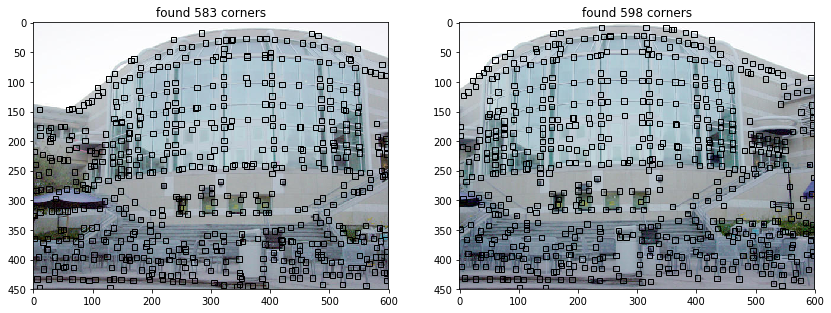

In [6]:
# input images
I1 = np.array(Image.open('price_center20.JPG'), dtype='float')/255.
I2 = np.array(Image.open('price_center21.JPG'), dtype='float')/255.

# parameters to tune
w = 9
t = 0.03
w_nms = 5

tic = time.time()
# run feature detection algorithm on input images
I1_grey = I1[...,:3].dot([0.299, 0.587, 0.114])
I2_grey = I2[...,:3].dot([0.299, 0.587, 0.114])

C1, pts1, J1_0, J1_1, J1_2 = RunFeatureDetection(I1_grey, w, t, w_nms)
C2, pts2, J2_0, J2_1, J2_2 = RunFeatureDetection(I2_grey, w, t, w_nms)
toc = time.time() - tic
print('took %f secs'%toc)

# display results
plt.figure(figsize=(14,24))

# show corners on original images
ax = plt.subplot(1,2,1)
plt.imshow(I1)
print(C1)
for i in range(C1): # draw rectangles of size w around corners
    x,y = pts1[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts1[0,:], pts1[1,:], '.b') # display subpixel corners
plt.title('found %d corners'%C1)

ax = plt.subplot(1,2,2)
plt.imshow(I2)
print(C2)
for i in range(C2):
    x,y = pts2[:,i]
    ax.add_patch(patches.Rectangle((x-w/2,y-w/2),w,w, fill=False))
# plt.plot(pts2[0,:], pts2[1,:], '.b')
plt.title('found %d corners'%C2)

plt.show()

#### Final values for parameters
* w = 9
* t = 0.03
* w_nms = 5
* C1 = 583
* C2 = 598

## Problem 2 (Programming): Feature matching (15 points)
Determine the set of one-to-one putative feature correspondences by performing
a brute-force search for the greatest correlation coefficient value (in the range
[-1, 1]) between the detected features in image 1 and the detected features in
image 2. Only allow matches that are above a specified correlation coefficient
threshold value (note that calculating the correlation coefficient allows for adjusting
the size of the matching window without changing the threshold value).
Further, only allow matches that are above a specified distance ratio threshold
value, where distance is measured to the next best match for a given feature.
Vary these parameters such that around 200 putative feature correspondences are
established. Optional: constrain the search to coordinates in image 2 that are
within a proximity of the detected feature coordinates in image 1.

#### Report your final values for:
* the size of the matching window
* the correlation coefficient threshold
* the distance ratio threshold 
* the size of the proximity window (if used)
* the resulting number of putative feature correspondences (i.e. matched features)

#### Display figures for:
* pair of images, where the matched features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image



In [4]:
def NCC(I1, I2, pts1, pts2, w):
    # compute the normalized cross correlation between image patches I1, I2
    # result should be in the range [-1,1]
    #
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    #
    # output:
    # normalized cross correlation matrix of scores between all windows in 
    #    image 1 and all windows in image 2
    
    """your code here"""
    R = int((w - 1) / 2)
    I1_padded = np.pad(I1, pad_width = R, mode = 'constant', constant_values = 0)
    I2_padded = np.pad(I2, pad_width = R, mode = 'constant', constant_values = 0)
    W_I1 = np.zeros((w*w, pts1.shape[1]))
    W_I2 = np.zeros((w*w, pts2.shape[1]))
    
    for i, pt1 in enumerate(pts1.T):
        # row of array is y in image, and col of array is x in image
        I1_patch = I1_padded[(pt1[1]):(pt1[1]+2*R+1),\
                             (pt1[0]):(pt1[0]+2*R+1)]
        I1_patch_mean = np.mean(I1_patch)
        I1_patch_norm = np.sum((I1_patch - I1_patch_mean)**2)
        W_I1_i = (I1_patch - I1_patch_mean) / np.sqrt(I1_patch_norm)
        W_I1[:, i] = W_I1_i.ravel() # data matrix 1, window size * num_points
        


    for i, pt2 in enumerate(pts2.T):
        I2_patch = I2_padded[(pt2[1]):(pt2[1]+2*R+1),\
                             (pt2[0]):(pt2[0]+2*R+1)]
        I2_patch_mean = np.mean(I2_patch)
        I2_patch_norm = np.sum((I2_patch - I2_patch_mean)**2)
        W_I2_i = (I2_patch - I2_patch_mean) / np.sqrt(I2_patch_norm)
        W_I2[:, i] = W_I2_i.ravel() # data matrix 1, window size * num_points
        
    scores = W_I1.T.dot(W_I2) # W_I1 * W_I2
    return scores




def Match(scores, t, d, p, pts1, pts2):
    # perform the one-to-one correspondence matching on the correlation coefficient matrix
    # 
    # inputs:
    # scores is the NCC matrix
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # output:
    # list of the feature coordinates in image 1 and image 2 
    
    """your code here"""
    #inds = np.vstack((np.random.choice(pts1.shape[1],200,replace=False), 
      #                np.random.choice(pts1.shape[1],200,replace=False)))
    masked_scores = scores.copy()
    feature_idx_I1 = []
    feature_idx_I2 = []
    
    mask = np.ones_like(scores).astype('bool') # initialize mask 
    
    while True:
        masked_scores[~mask] = -np.inf # masking scores
        
        # step1: find index of first maximum value in masked cross-correlation coefficient array
        first_max_idx = np.unravel_index(masked_scores.argmax(), masked_scores.shape) # W_I1 * W_I2
        
        # step2: store first maximum value
        first_max_scr = np.max(masked_scores)
        if t >= first_max_scr: break
            
        # step3: temporarily set that first maximum value to -1 in original scores array
        scores[first_max_idx] = -1
        
        # step4: find second maximum value and index, in the row which contains first maximum value (non masked)
        max_row_element = np.max(scores[first_max_idx[0], :])
        max_col_element = np.max(scores[:, first_max_idx[1]])
        
        second_max_scr = max(max_row_element, max_col_element)
        
        # step5: set the first maximum value back into original scores matrix
        scores[first_max_idx] = first_max_scr
        
        # step6: if (1 - Best Match) < (1 - next best match) * distance ratio threshold, then first is best match, store it
        # then pass to step 7
        if (1 - first_max_scr) < (1 - second_max_scr) * d:
            I1_pt = pts1[:, first_max_idx[0]]
            I2_pt = pts2[:, first_max_idx[1]]
            checkInProximityWindow = (abs(I2_pt[1] - I1_pt[1]) < p/2) and (abs(I2_pt[0] - I1_pt[0]) <= p/2)
            if checkInProximityWindow:
                feature_idx_I1.append(first_max_idx[0])
                feature_idx_I2.append(first_max_idx[1])
        # else it is not unique and pass to step 7

        # step7: using first maximum idx to set row and col of the mask false
        mask[first_max_idx[0], :] = False
        mask[:, first_max_idx[1]] = False
        
        
    inds = np.vstack((feature_idx_I1, feature_idx_I2)) # represent feature window idx
    return inds



def RunFeatureMatching(I1, I2, pts1, pts2, w, t, d, p):
    # inputs:
    # I1, I2 are the input images
    # pts1, pts2 are the point to be matched
    # w is the size of the matching window to compute correlation coefficients
    # t is the correlation coefficient threshold
    # d distance ration threshold
    # p is the size of the proximity window
    #
    # outputs:
    # inds is a 2xk matrix of matches where inds[0,i] indexs a point pts1 
    #     and inds[1,i] indexs a point in pts2, where k is the number of matches
    
    scores = NCC(I1, I2, pts1, pts2, w)
    inds = Match(scores, t, d, p, pts1, pts2) 
    return inds



took 0.428901 secs


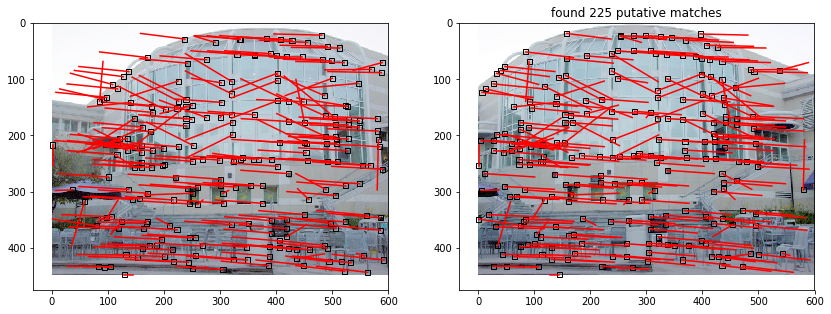

unique points in image 1: 225
unique points in image 2: 225


In [5]:
# # parameters to tune
# w = 5
# t = 1
# d = 1
# p = np.inf
I1 = np.array(Image.open('price_center20.JPG'), dtype='float')/255.
I2 = np.array(Image.open('price_center21.JPG'), dtype='float')/255.

I1_grey = I1[...,:3].dot([0.299, 0.587, 0.114])
I2_grey = I2[...,:3].dot([0.299, 0.587, 0.114])

w1 = 9
t = 0.6
d = 1.1
# p = np.inf
p = 200  # 200 * 200 window, but use 200/2 as threshold

tic = time.time()
# run the feature matching algorithm on the input images and detected features
inds = RunFeatureMatching(I1_grey, I2_grey, pts1, pts2, w1, t, d, p)
toc = time.time() - tic

print('took %f secs'%toc)

# create new matrices of points which contain only the matched features 
match1 = pts1[:,inds[0,:]]
match2 = pts2[:,inds[1,:]]

# # display the results
plt.figure(figsize=(14,24))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
plt.title('found %d putative matches'%match1.shape[1])
for i in range(match1.shape[1]):
    x1,y1 = match1[:,i]
    x2,y2 = match2[:,i]
    ax1.plot([x1, x2],[y1, y2],'-r')
    ax1.add_patch(patches.Rectangle((x1-w/2,y1-w/2),w,w, fill=False))
    ax2.plot([x2, x1],[y2, y1],'-r')
    ax2.add_patch(patches.Rectangle((x2-w/2,y2-w/2),w,w, fill=False))

plt.show()

print('unique points in image 1: %d'%np.unique(inds[0,:]).shape[0])
print('unique points in image 2: %d'%np.unique(inds[1,:]).shape[0])

#### Final values for parameters
* w = 9
* t = 0.6
* d = 1.1
* p = 200
* num_matches = 225

## Problem 3 (Programming): Outlier Rejection (15 points)
The resulting set of putative point correspondences should contain both inlier
and outlier correspondences (i.e., false matches). Determine the set of inlier point
correspondences using the M-estimator Sample Consensus (MSAC) algorithm,
where the maximum number of attempts to find a consensus set is determined
adaptively. For each trial, you must use the 4-point algorithm (as described in
lecture) to estimate the planar projective transformation from the 2D points in
image 1 to the 2D points in image 2. Calculate the (squared) Sampson error as a
first order approximation to the geometric error.

hint: this problem has codimension 2

#### Report your values for:
 * the probability $p$ that as least one of the random samples does not contain any outliers
 * the probability $\alpha$ that a given point is an inlier
 * the resulting number of inliers
 * the number of attempts to find the consensus set
 * the tolerance for inliers
 * the cost threshold
 
#### Display figures for:
* pair of images, where the inlier features in each of the images are indicated by a square window about the feature and a line segment is drawn from the feature to the coordinates of the corresponding feature in the other image


In [6]:
from scipy.stats import chi2
import numpy as np
import time
import random


def Homogenize(x):
    # converts points from inhomogeneous to homogeneous coordinates
    return np.vstack((x,np.ones((1,x.shape[1]))))

def Dehomogenize(x):
    # converts points from homogeneous to inhomogeneous coordinates
    return x[:-1]/x[-1]



took 0.215882 secs
19 iterations
inlier count:  155
inliers:  [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 31, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 129, 130, 132, 137, 138, 139, 141, 143, 145, 147, 148, 151, 152, 153, 155, 157, 160, 162, 163, 164, 165, 166, 167, 170, 173, 175, 176, 178, 179, 180, 181, 183, 187, 189, 190, 195, 196, 199, 200, 201, 202, 204, 205, 207, 209, 210, 215, 216, 217, 221, 222, 223]
MSAC Cost=479.156840069
H_MSAC = 
[[ 1.11377138e-02 -4.71318996e-05 -9.84870046e-01]
 [ 3.30571649e-04  1.08301875e-02 -1.72280665e-01]
 [ 1.25713003e-06 -3.33926383e-08  1.04361256e-02]]


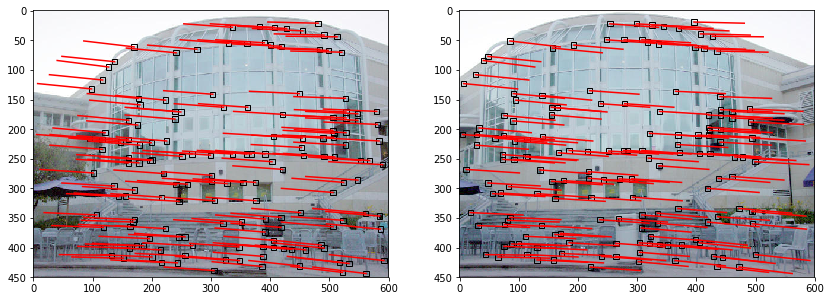

In [21]:
def ConsensusCost(err_vect, count, tol):
    cost = 0 
    inlier_idxs =  []
    for i in range(count):
        if err_vect[i] <= tol:
            cost = cost + err_vect[i]
            inlier_idxs.append(i)  
        else:
            cost = cost + tol
    return cost, inlier_idxs


def getInvHi(selected_samples_ptsi):
    """i can be 1 OR 2"""
    ptsi_homog = Homogenize(selected_samples_ptsi) # 3 * 4
    
    A = ptsi_homog[:, :3]
    Y = ptsi_homog[:, -1] [:, None]
    
    # get lam1, lam2, lam3 scalar
    lams = (np.linalg.inv(A) @ Y)
    
    InvHi = np.hstack((A[:, 0][:, None] * lams[0], 
                       A[:, 1][:, None] * lams[1],
                       A[:, 2][:, None] * lams[2]))
    return InvHi




def getH(invH1, invH2):
    H = invH2 @ np.linalg.inv(invH1)
    H = H/np.linalg.norm(H)
    return H
    
    
def getSampsonError(pts1, pts2, H, total_num_points):
    # inhomog pts1 and pts2
    error_vec = []
    Sampson_vecs = np.zeros((4, total_num_points))
    for i in range(total_num_points):
        x1 = pts1[0,i]
        y1 = pts1[1,i]
        x2 = pts2[0,i]
        y2 = pts2[1,i]
        
        A = np.array([[0,0,0, -x1,-y1,-1, y2*x1,y2*y1,y2],\
                      [x1,y1,1, 0,0,0, -x2*x1,-x2*y1,-x2]])
        h = H.reshape(-1)[:, None]
        epsil = A.dot(h) # 2*1
        
        # to get delta we need J and lambda
        J = np.array([[-H[1,0]+y2*H[2,0],-H[1,1]+y2*H[2,1],0,x1*H[2,0]+y1*H[2,1]+H[2,2]],\
                      [H[0,0]-x2*H[2,0],H[0,1]-x2*H[2,1],-(x1*H[2,0]+y1*H[2,1]+H[2,2]),0]]) # 2*4
        lambda_s = np.linalg.inv(J @ (J.T)) @ (-epsil)
        
        delta = J.T.dot(lambda_s) # 4*1
        Sampson_vecs[:, i] = delta.ravel() # for sampson correction
        # get sampson error 
        error = delta.T @ delta
        error_vec.append(error)
    return error_vec, Sampson_vecs
    

def MSAC(pts1, pts2, thresh, tol, p):
    # Inputs:
    #    pts1 - matched feature correspondences in image 1
    #    pts2 - matched feature correspondences in image 2
    #    thresh - cost threshold
    #    tol - reprojection error tolerance 
    #    p - probability that as least one of the random samples does not contain any outliers   
    #
    # Output:
    #    consensus_min_cost - final cost from MSAC
    #    consensus_min_cost_model - planar projective transformation matrix H
    #    inliers - list of indices of the inliers corresponding to input data
    #    trials - number of attempts taken to find consensus set
    
    """your code here"""
#     trials = 0
#     max_trials = np.inf
#     consensus_min_cost = np.inf
#     consensus_min_cost_model = np.zeros((3,4))
#     inliers = np.random.randint(0, 200, size=100)
    
    
    trials = 0
    max_trials = np.inf
    consensus_min_cost = np.inf
    consensus_min_cost_model = np.zeros((3,4))
    
    
    total_num_points = pts1.shape[1]
    s = 4
    while (trials < max_trials and consensus_min_cost > thresh) :
        # select random samples, in this case 4
        selected_sample_idxs = random.sample(range(total_num_points), s)
        selected_samples_pts1 = pts1[:, selected_sample_idxs]
        selected_samples_pts2 = pts2[:, selected_sample_idxs]
        invH1 = getInvHi(selected_samples_pts1)
        invH2 = getInvHi(selected_samples_pts2)
        H = getH(invH1, invH2)
        
        # calculate error for each data point, under each model, which is Sampson error
        error_vect, _ = getSampsonError(pts1, pts2, H, total_num_points)
        
        # calculate consensus cost
        consensus_cost, inlier_idxs = ConsensusCost(error_vect, total_num_points, tol)
        if consensus_cost < consensus_min_cost:
            consensus_min_cost = consensus_cost
            consensus_min_cost_model = H
            inliers = inlier_idxs
            w = len(inlier_idxs) / total_num_points
            max_trials = np.log(1-p)/np.log(1-w**s)
        trials = trials + 1
    return consensus_min_cost, consensus_min_cost_model, inliers, trials



# MSAC parameters 
thresh = 200
p = 0.99
alpha = 0.95
freedom = 2
tol = chi2.ppf(alpha, freedom) * 1 # inverse chi squared cumulative distribution function * sigma^2 = 1

pts1 = match1
pts2 = match2

tic=time.time()
cost_MSAC, H_MSAC, inliers, trials = MSAC(pts1, pts2, thresh, tol, p)
# choose just the inliers
x1 = pts1[:,inliers]
x2 = pts2[:,inliers]
outliers = np.setdiff1d(np.arange(pts1.shape[1]),inliers)

toc=time.time()
time_total=toc-tic

# display the results
print('took %f secs'%time_total)
print('%d iterations'%trials)
print('inlier count: ',len(inliers))
print('inliers: ',inliers)
print('MSAC Cost=%.9f'%cost_MSAC)
print('H_MSAC = ')
print(H_MSAC)

# display the figures
"""your code here"""
w1 = 9
plt.figure(figsize=(14,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(I1)
ax2.imshow(I2)
for i in range(len(inliers)):
    x1_x, x1_y = x1[:, i]
    x2_x, x2_y = x2[:, i]

    ax1.plot([x1_x, x2_x],[x1_y, x2_y],'-r')
    ax1.add_patch(patches.Rectangle((x1_x-w1/2,x1_y-w1/2),w1,w1, fill=False))
    ax2.plot([x2_x, x1_x],[x2_y, x1_y],'-r')
    ax2.add_patch(patches.Rectangle((x2_x-w1/2,x2_y-w1/2),w1,w1, fill=False))
plt.show()

#### Final values for parameters
* $p$ = 0.99
* $\alpha$ = 0.95
* tolerance = 5.99
* threshold = 200
* num_inliers = 155
* num_attempts = 19

## Problem 4 (Programming): Linear Estimate (15 points)
  Estimate the planar projective transformation $\boldsymbol{H}_\text{DLT}$
  from the resulting set of inlier correspondences using the direct
  linear transformation (DLT) algorithm (with data normalization).
  You must express $\boldsymbol{x}'_i = \boldsymbol{H} \boldsymbol{x}_i$ as
  $[\boldsymbol{x}'_i]^\perp \boldsymbol{H} \boldsymbol{x}_i = \boldsymbol{0}$ (not
  $\boldsymbol{x}'_i \times \boldsymbol{H} \boldsymbol{x}_i = \boldsymbol{0}$), where
  $[\boldsymbol{x}'_i]^\perp \boldsymbol{x}'_i = \boldsymbol{0}$, when forming the
  solution. Return $\boldsymbol{H}_\text{DLT}$, scaled such that
  $||\boldsymbol{H}_\text{DLT}||_\text{Fro} = 1$

In [22]:
def Normalize(pts):
    # data normalization of n dimensional pts
    #
    # Input:
    #    pts - is in inhomogeneous coordinates
    # Outputs:
    #    pts - data normalized points
    #    T - corresponding transformation matrix
    """your code here"""
    num = pts.shape[0] # 3 or 2
    var_sum = np.sum(np.var(pts, axis=1)) # sum(varx, vary, varz) or sum(varx, vary)
    mean = np.mean(pts, axis=1) # ux, uy, uz or ux, uy
    s = np.sqrt(num/var_sum)
    
    T = np.eye(pts.shape[0]+1)
    
    diag_s = np.eye(pts.shape[0]) * s
    T[0:num, 0:num] = diag_s
    T[0:-1, -1] = -mean * s
    
    pts_homog = Homogenize(pts) # make pts from inhomog to homog
    pts = Dehomogenize(T.dot(pts_homog)) # normalized inhomog pts
    return pts, T

def Sinc(x):
    # Returns a scalar valued sinc value
    """your code here"""
    if x == 0:
        y = 1
    else:
        y = np.sin(x) / x
    return y

def Parameterize(P):
    # wrapper function to interface with LM
    # takes all optimization variables and parameterizes all of them
    # in this case it is just P, but in future assignments it will
    # be more useful   
    return ParameterizeHomog(P.reshape(-1,1))


def Deparameterize(p):
    # Deparameterize all optimization variables
    return DeParameterizeHomog(p) # need to be reshape 3,4 or keep 



def ParameterizeHomog(V):
    # Given a homogeneous vector V return its minimal parameterization
    """your code here"""
    num = V.shape[0]
    
    V_normed = V / np.linalg.norm(V)
    a = V_normed[0, 0]
    b = V_normed[1:, 0]
    
    v = 2.0/Sinc(np.arccos(a)) * b # (11,)
    
    v_norm = np.linalg.norm(v)
    if v_norm > np.pi: 
        v = (1 - 2*np.pi/v_norm * np.ceil((v_norm - np.pi)/(2*np.pi))) * v 
        if v_norm == 2 * np.pi:
            v = np.zeros(num - 1)
            v[0] = -1
    return v[:, None]


def DeParameterizeHomog(v):
    # Given a parameterized homogeneous vector return its deparameterization
    """your code here"""
    num = v.shape[0]
    v_norm = np.linalg.norm(v)
    if v_norm > np.pi: 
        v = (1 - 2.0*np.pi/v_norm * np.ceil((v_norm - np.pi)/(2.0*np.pi))) * v 
        if v_norm == 2 * np.pi:
            v = np.zeros(num)
            v[0] = -1
        
    a = np.cos(v_norm / 2)
    b = Sinc(v_norm/2) / 2 * v # vector
    
    a = np.array([a])[:, None]
    V = np.vstack((a, b)) # (12, 1)
    
    V = V / np.linalg.norm(V)
    return V

In [23]:
def getSampsonCorrection(x1, Sampson_vecs):
    x1_params = np.zeros_like(x1) # r2
    x1_deprms = np.zeros_like(x1) # r2
    
    for i in range(x1.shape[1]):
        # correction
        x1_x = x1[0, i] + Sampson_vecs[0, i]
        x1_y = x1[1, i] + Sampson_vecs[1, i]
        x1_deprm = np.vstack((x1_x, x1_y))
        x1_homog = Homogenize(x1_deprm)
        # param
        x1_param = Parameterize(x1_homog)
        x1_params[:, i] = x1_param.ravel()
        # deparam
        x1_deprms[:, i] = x1_deprm.ravel()
        
    return x1_params, x1_deprms



def DLT(x1, x2, normalize=True):
    # Inputs:
    #    x1 - inhomogeneous inlier correspondences in image 1
    #    x2 - inhomogeneous inlier correspondences in image 1
    #    normalize - if True, apply data normalization to x1 and x2
    #
    # Outputs:
    #    H - the DLT estimate of the planar projective transformation   
    #    cost - linear estimate cost
    
    """your code here"""
    total_num_points = x1.shape[1]
    # data normalization
    if normalize:
        print('normalize')
        x1_nmd, T1 = Normalize(x1) # inhomog
        x2_nmd, T2 = Normalize(x2)

        cov_x1i = np.eye(2) * (T1[0,0]**2)
        cov_x2i = np.eye(2) * (T2[0,0]**2)

    # data denormalize
    else:
        print('denormalize')
        x1_nmd = x1
        x2_nmd = x2
        cov_x1i = np.eye(2)
        cov_x2i = np.eye(2)
        
        
    x1_nmd_homog = Homogenize(x1_nmd) # nmd normalized
    x2_nmd_homog = Homogenize(x2_nmd)
    
    x2_nmd_norm = np.linalg.norm(x2_nmd_homog, axis=0) # 1* 155
    sign = np.sign(x2_nmd_homog[0,:]) # 155
    e1 = np.array([1, 0, 0])[:, None]
    v = x2_nmd_homog + sign * x2_nmd_norm * e1 # 3 * 155
    I = np.eye(x2_nmd_homog.shape[0])
    
    A = np.zeros((2 * x2.shape[1], x2_nmd_homog.shape[0] * x1_nmd_homog.shape[0])) # (2*155) * 9
    for i in range(v.shape[1]):
        v_i = v[:, i] [:, None] # 3*1
        Hv_i = I - 2 * v_i.dot(v_i.T)/(v_i.T.dot(v_i))
        leftNullSpace = Hv_i[1:, :] * 1 # 2* 3 leftnull space of one x2_nmd_homog
        A[2*i : 2*i + 2 , :] = np.kron(leftNullSpace, x1_nmd_homog[:, i].reshape(-1))
    
    _,S,VH = np.linalg.svd(A)    
    H_vector = VH[-1, :]
    H = H_vector.reshape((3, 3)) # row wise
    
    _, Sampson_vecs = getSampsonError(x1_nmd, x2_nmd, H, total_num_points)
    x1_nmd_params, x1_nmd_deprms = getSampsonCorrection(x1_nmd, Sampson_vecs) # parameterize R2, depara R2
    
    x2_nmd_p = Dehomogenize(H @ Homogenize(x1_nmd_deprms))
    x1_nmd_p = x1_nmd_deprms # scene pts by sampson correction from x1_nmd
    
    err2 = x2_nmd - x2_nmd_p
    err1 = x1_nmd - x1_nmd_p
    cost = 0
    for i in range(total_num_points):
        cost += err2[:, i] [None, :] @ np.linalg.inv(cov_x2i) @ err2[:, i] [:, None] + \
                err1[:, i] [None, :] @ np.linalg.inv(cov_x1i) @ err1[:, i] [:, None]
        
    if normalize:
        print('denormalizing H')
        H = np.linalg.inv(T2) @ H @ T1 # origin pixel frame
        
    H = H / np.linalg.norm(H)
    return H, cost



# compute the linear estimate without data normalization
print ('Running DLT without data normalization')
time_start=time.time()
H_DLT, cost = DLT(x1, x2, normalize=False)
time_total=time.time()-time_start
# display the results
print('took %f secs'%time_total)
print('Cost=%.9f'%cost)
print('H_DLT = ')
print(H_DLT)

print('\n')
# compute the linear estimate with data normalization
print ('Running DLT with data normalization')
time_start=time.time()
H_DLT, cost = DLT(x1, x2, normalize=True)
time_total=time.time()-time_start
# display the results
print('took %f secs'%time_total)
print('Cost=%.9f'%cost)
print('H_DLT = ')
print(H_DLT)

Running DLT without data normalization
denormalize
took 0.033088 secs
Cost=288.409556410
H_DLT = 
[[ 1.08781407e-02  8.42438340e-06 -9.84236717e-01]
 [ 3.18816104e-04  1.05978735e-02 -1.75912176e-01]
 [ 1.24087136e-06  1.55024041e-07  1.01113723e-02]]


Running DLT with data normalization
normalize
denormalizing H
took 0.030136 secs
Cost=42.812814201
H_DLT = 
[[-1.09366180e-02  7.94502724e-06  9.84552800e-01]
 [-3.18385556e-04 -1.06470335e-02  1.74122995e-01]
 [-1.23279679e-06 -8.50090869e-08 -1.01929163e-02]]


## Problem 5 (Programming): Nonlinear Estimate (45 points) 
 Use $\boldsymbol{H}_\text{DLT}$ and the Sampson corrected points (in image 1) as an initial estimate to an iterative estimation method,
  specifically the sparse Levenberg-Marquardt algorithm, to
  determine the Maximum Likelihood estimate of the planar projective
  transformation that minimizes the reprojection error.  You must
  parameterize the planar projective transformation matrix and the
  homogeneous 2D scene points that are being adjusted using the
  parameterization of homogeneous vectors (see section A6.9.2 (page 624) of the textbook, and the corrections and errata).
  
  Report the initial cost (i.e. cost at iteration 0) and the cost at the end
  of each successive iteration. Show the numerical values for the final 
  estimate of the planar projective transformation matrix $\boldsymbol{H}_\text{LM}$, scaled
  such that $||\boldsymbol{H}_\text{LM}||_\text{Fro} = 1$.

In [24]:
from scipy.linalg import block_diag

def Sinc(x):
    # Returns a scalar valued sinc value
    """your code here"""
    if x == 0:
        y = 1
    else:
        y = np.sin(x) / x
    return y

def d_Sinc(x):
    if x == 0:
        return 0
    else:
        return np.cos(x)/x-np.sin(x)/(x**2)


def tail(p):
    """
    d_Xhomog/d_xparam
    
    P is homog
    p is homog_paramed
    """
    n = p.shape[0]
    
    p_norm = np.linalg.norm(p)
    b = (Sinc(p_norm/2.0)/2.0*p).ravel()
    if p_norm == 0:
        da_dp = np.zeros((1, n))
        db_dp = 0.5 * np.eye(n)
    else:
        da_dp = - 0.5 * b[None, :]
        db_dp = 0.5 * Sinc(0.5 * p_norm) * np.eye(n) + 0.25/p_norm * d_Sinc(0.5 * p_norm) * p.dot(p.T)
    return np.vstack((da_dp, db_dp))


    
def Jacobian(xs, xs_prm, H, h):
    """
    xs inhomog 2d pts 2*N
    xs_prm parameterized from xs_homog, 2* N
    h is parameterized H, which is for image 2
    """
    num_pts = xs.shape[1]
  
    x1_p = xs # assume scene is based on image 1
    xs_homog = Homogenize(xs)
    x2_p = Dehomogenize(H @ xs_homog)
    H1 = np.eye(3) # map from scene to image1
    
    A2_lst = []
    B1_lst = []
    B2_lst = []
    for i in range(num_pts) :
        
        x = xs_homog[:, i] # scene
        x_ = xs_prm[:, i]
        
        # A2_i, d(x2_p)/ d(h) 2 * 8
        x2_ = x2_p[:, i]
        wi_A2 = sum(H[-1, :] * x)
        A2_i = np.array([[x[0], x[1], x[2], 0, 0, 0, -x2_[0]*x[0], -x2_[0]*x[1], -x2_[0]*x[2]],
                         [0, 0, 0, x[0], x[1], x[2], -x2_[1]*x[0], -x2_[1]*x[1], -x2_[1]*x[2]]]) @ tail(h) / wi_A2
        A2_lst.append(A2_i)
        
        # B2_i
        wi_B2 = sum(H[-1, :] * x)
        B2_i = np.array([H[0, :] - x2_[0] * H[2, :],
                         H[1, :] - x2_[1] * H[2, :]]) @ tail(x_[:, None]) / wi_B2
        B2_lst.append(B2_i)
        
        # B1_i
        x1_ = x1_p[:, i]
        wi_B1 = sum(H1[-1, :] * x)
        B1_i = np.array([H1[0, :] - x1_[0] * H1[2, :],
                         H1[1, :] - x1_[1] * H1[2, :]]) @ tail(x_[:, None]) / wi_B1
        B1_lst.append(B1_i) 
    return A2_lst, B1_lst, B2_lst


    

In [29]:
def LM(H, x1, x2, max_iters, lam):
    # Input:
    #    H - DLT estimate of planar projective transformation matrix
    #    x1 - inhomogeneous inlier points in image 1
    #    x2 - inhomogeneous inlier points in image 2
    #    max_iters - maximum number of iterations
    #    lam - lambda parameter
    # Output:
    #    H - Final H (3x3) obtained after convergence
    
    """your code here"""

    num_pts = x1.shape[1]
    # data normalization
    x1_nmd, T1 = Normalize(x1) # inhomog
    x2_nmd, T2 = Normalize(x2)
    cov_x1i = np.eye(2) * (T1[0,0]**2)
    cov_x2i = np.eye(2) * (T2[0,0]**2)

    H = T2 @ H @ np.linalg.inv(T1)
  
    
    _, Sampson_vecs = getSampsonError(x1_nmd, x2_nmd, H, num_pts)
    x1_nmd_params, x1_nmd_deprms = getSampsonCorrection(x1_nmd, Sampson_vecs) # parameterize R2, depara R2 (2D point)
    # above are both scene point(corrected) is paramertized (inhomog -> homog-.param), one is origin inhomog
    
    # step 1
    x2_nmd_p = Dehomogenize(H @ Homogenize(x1_nmd_deprms))
    e1 = x1_nmd - x1_nmd_deprms
    e2 = x2_nmd - x2_nmd_p
    for j in range(max_iters): 
        # step 2: calculate Jacobian matrix 
        h = Parameterize(H)
        A2_lst, B1_lst, B2_lst = Jacobian(x1_nmd_deprms, x1_nmd_params, H, h)
        
        # step 3: calculate normal equation
        U2 = 0
        e_a = 0
        e_b_lst = []
        
        v1_lst = []
        w2_lst = []
        for i in range(num_pts):
            A2_i = A2_lst[i]
            B1_i = B1_lst[i]
            B2_i = B2_lst[i]
            
            e1_i = e1[:, i] [:, None]
            e2_i = e2[:, i] [:, None]
            ##calculate normal equation matrix 
            U2 += A2_i.T @ np.linalg.inv(cov_x2i) @ A2_i
            
            v1_i = B1_i.T @ np.linalg.inv(cov_x1i) @ B1_i + \
                   B2_i.T @ np.linalg.inv(cov_x2i) @ B2_i
            v1_lst.append(v1_i)
            
            w2_i = A2_i.T @ np.linalg.inv(cov_x2i) @ B2_i
            w2_lst.append(w2_i)
        
            ##calculate mormal equation vector
            e_a += A2_i.T @ np.linalg.inv(cov_x2i) @ e2_i
            
            e_b_i = B1_i.T @ np.linalg.inv(cov_x1i) @ e1_i + \
                    B2_i.T @ np.linalg.inv(cov_x2i) @ e2_i
            e_b_lst.append(e_b_i)

        iter_num = 0
        while True:
            if iter_num>20:
                break
            # step 4: calculate Augmented normal equation, and solve for delta
            S = 0
            E = 0
            for i in range(num_pts):
                v1_i = v1_lst[i]
                w2_i = w2_lst[i]
                v1_i_aug = v1_i + lam * np.eye(v1_i.shape[1])
                S += w2_i @ np.linalg.inv(v1_i_aug) @ w2_i.T
                e_b_i = e_b_lst[i]
                E += w2_i @ np.linalg.inv(v1_i_aug) @ e_b_i
            S2 = U2 + lam * np.eye(U2.shape[1]) - S
            E2 = e_a - E
            delta_a = np.linalg.inv(S2) @ E2 # solve for delta a

            # now solve for delta b
            delta_b = np.zeros_like(x1_nmd_params) # array 2 * N
            for i in range(num_pts):
                v1_i = v1_lst[i]
                w2_i = w2_lst[i]
                e_b_i = e_b_lst[i]
                v1_i_aug = v1_i + lam * np.eye(v1_i.shape[1])
                delta_b_i = np.linalg.inv(v1_i_aug) @ (e_b_i - w2_i.T @  delta_a)
                delta_b[:, i] = delta_b_i.ravel()

            # step 5: update parameters using delta_a and delta_b
            h_c = h + delta_a
            x1_nmd_params_c = x1_nmd_params + delta_b
            x1_nmd_deprms_c = np.zeros_like(x1_nmd_params_c)
            for i in range(x1_nmd_params_c.shape[1]):
                x1_nmd_param_c = x1_nmd_params_c[:, i] [:, None]
                x1_nmd_deprm_c = Dehomogenize(Deparameterize(x1_nmd_param_c))
                x1_nmd_deprms_c[:, i] = x1_nmd_deprm_c.ravel()

            # step 6: make new predication on these canidate value, and find diff
            x1_nmd_c = x1_nmd_deprms_c
            H_c = Deparameterize(h_c).reshape(3,3)
            x2_nmd_c = Dehomogenize(H_c @ Homogenize(x1_nmd_deprms_c))
            e1_c = x1_nmd - x1_nmd_c  #candiate
            e2_c = x2_nmd - x2_nmd_c

            # step 7: calculate cost 
            cost_now = 0
            cost_pre = 0
            for i in range(num_pts):
                cost_now += e2_c[:, i] [None, :] @ np.linalg.inv(cov_x2i) @ e2_c[:, i] [:, None] + \
                            e1_c[:, i] [None, :] @ np.linalg.inv(cov_x1i) @ e1_c[:, i] [:, None]

                cost_pre += e2[:, i] [None, :] @ np.linalg.inv(cov_x2i) @ e2[:, i] [:, None] + \
                            e1[:, i] [None, :] @ np.linalg.inv(cov_x1i) @ e1[:, i] [:, None]
                
            if cost_now < cost_pre: #or abs(cost_now - cost_pre) < 0.000001:
                e1 = e1_c
                e2 = e2_c
                H = H_c
                x1_nmd_params = x1_nmd_params_c
                x1_nmd_deprms = x1_nmd_deprms_c
                lam = 0.1 * lam
                # jump to step 2
                break
            else:
                # jump to step 4, and this is not an iteration
                lam = 10 * lam
                iter_num = iter_num + 1
                
        cost = cost_now
        print ('iter %03d Cost %.9f'%(j+1, cost))
    
    # data denormalization
    H = np.linalg.inv(T2) @ H @ T1 # origin pixel frame
    H = H / np.linalg.norm(H) * np.sign(H[-1,-1])
    return H


# LM hyperparameters
lam = .001
max_iters = 10

# Run LM initialized by DLT estimate with data normalization
print ('Running sparse LM with data normalization')
print ('iter %03d Cost %.9f'%(0, cost))
time_start=time.time()

H_LM = LM(-H_DLT, x1, x2, max_iters, lam)
time_total=time.time()-time_start
print('took %f secs'%time_total)

Running sparse LM with data normalization
iter 000 Cost 42.812814201
iter 001 Cost 42.811875860
iter 002 Cost 42.783391379
iter 003 Cost 42.783096562
iter 004 Cost 42.783095341
iter 005 Cost 42.783094446
iter 006 Cost 42.783093847
iter 007 Cost 42.783093518
iter 008 Cost 42.783093434
iter 009 Cost 42.783093432
iter 010 Cost 42.783093432
took 0.829523 secs


In [30]:
# display your converged H_LM, scaled with its frobenius norm
print('H_LM = ')
print(H_LM)

H_LM = 
[[ 1.09337834e-02 -7.55818678e-06 -9.84509389e-01]
 [ 3.18820653e-04  1.06441756e-02 -1.74368951e-01]
 [ 1.23599220e-06  8.85730261e-08  1.01874340e-02]]
